In [ ]:
import sys
sys.path.append("notebooks/scripts/")

## Define inputs, outputs, and parameters

In [2]:
import matplotlib.pyplot as plt 

In [2]:
df_path = snakemake.input.dataframe

NameError: name 'snakemake' is not defined

In [ ]:
png_chart = snakemake.output.png

In [3]:
import pandas as pd
within_between_df_training = pd.read_csv("../seasonal-flu-nextstrain/results/full_within_between_stats.csv")
within_between_df_test = pd.read_csv("../seasonal-flu-nextstrain-2018-2020/results/full_within_between_stats.csv")
within_between_df_sars_training = pd.read_csv("../sars-cov-2-nextstrain/results/full_within_between_stats.csv")
within_between_df_sars_test = pd.read_csv("../sars-cov-2-nextstrain-2022-2023/results/full_within_between_stats.csv")

In [36]:
within_between_df_sars_test

,comparison,mean,median,std,group
0,between,42.165555,42.0,19.543444,Nextstrain_clade
1,within,15.852760,13.0,12.268796,Nextstrain_clade
2,between,39.875378,39.0,20.251163,Nextclade_pango_collapsed
3,within,9.683404,9.0,5.412127,Nextclade_pango_collapsed
4,between,37.525671,35.0,20.085630,pca_label_for_Nextstrain_clade
5,within,39.009072,39.0,21.092101,pca_label_for_Nextstrain_clade
6,between,37.525671,35.0,20.085630,pca_label_for_Nextclade_pango_collapsed
7,within,39.009072,39.0,21.092101,pca_label_for_Nextclade_pango_collapsed
8,between,45.566264,45.0,16.908065,mds_label_for_Nextstrain_clade
9,within,13.946501,13.0,5.885517,mds_label_for_Nextstrain_clade


In [7]:
def make_subplot(df, ax):
    x_positions = np.arange(len(df.to_numpy()) // 2)
    
    ax.errorbar(df[df["comparison"] == "within"]["mean"][::-1], x_positions, xerr= df[df["comparison"] == "within"]["std"][::-1], fmt='o', color="blue", label="within", capsize=2)
    ax.errorbar(df[df["comparison"] == "between"]["mean"][::-1], x_positions + 0.1, xerr= df[df["comparison"] == "between"]["std"][::-1], fmt='o', color="orange", label="between", capsize=2)
    ax.set_yticklabels([""] + list(df[df["comparison"] == "within"]["group"])[::-1])
    ax.set_xlim(0, 70)

    sns.despine()
    return ax

/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


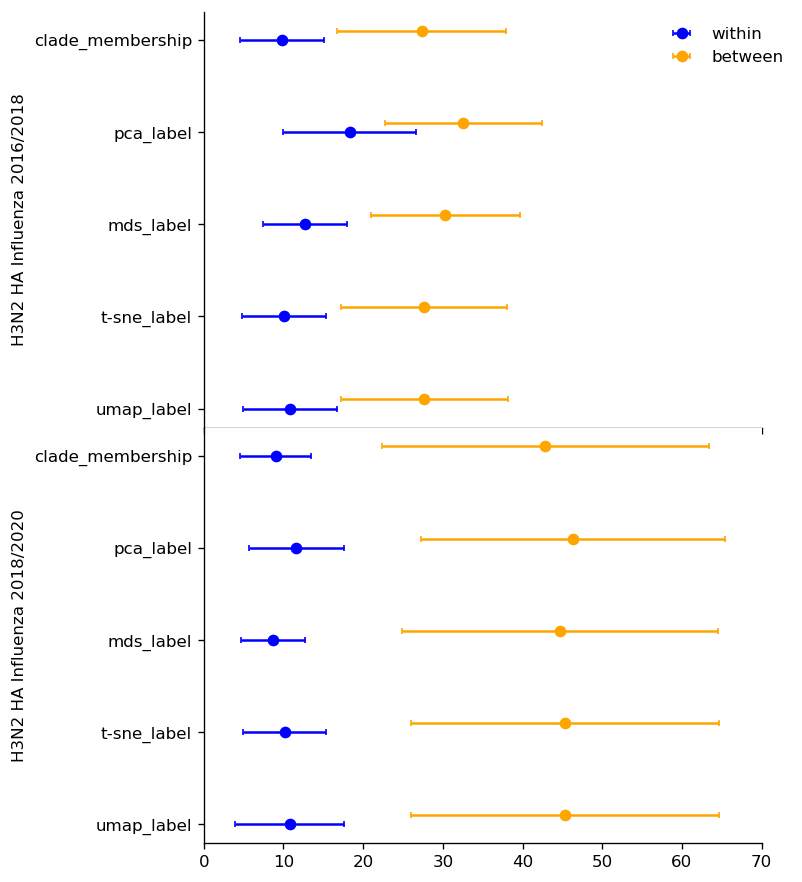

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(6, 9), dpi=120, sharex='col')

make_subplot(within_between_df_training, ax[0])
make_subplot(within_between_df_test, ax[1])

ax[0].set_ylabel("H3N2 HA Influenza 2016/2018")
ax[1].set_ylabel("H3N2 HA Influenza 2018/2020")

ax[0].legend(
    frameon=False,
    bbox_to_anchor=(0.8, 1.0), 
    loc="upper left"
)

plt.subplots_adjust(hspace=.0)
sns.despine()

#early and late side by side instead of below eachother

In [38]:
def make_subplot_sars(df, ax, nextstrain_or_pango, label): #'Nextstrain_clade' or 'pango'
    grouped = df.groupby(df["group"].str.contains(nextstrain_or_pango))
    
    group = grouped.get_group(True)

    y_ticklabels = []

    x_positions = np.arange(len(group.to_numpy()) // 2)

    ax.errorbar(group[group["comparison"] == "within"]["mean"][::-1], x_positions, xerr= group[group["comparison"] == "within"]["std"][::-1], fmt='o', color="blue", label=label + " within", capsize=2)
    ax.errorbar(group[group["comparison"] == "between"]["mean"][::-1], x_positions + 0.2, xerr= group[group["comparison"] == "between"]["std"][::-1], fmt='o', color="orange", label=label + " between", capsize=2)
    y_ticklabels = [""] + [val.replace("_for_" + str(nextstrain_or_pango), "") for val in list(group[group["comparison"] == "within"]["group"])[::-1]]
    y_ticklabels[-1] = "clade_membership"

    ax.set_yticklabels(y_ticklabels)
    ax.set_xlim(0, 70)

    sns.despine()
    
    return ax

/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


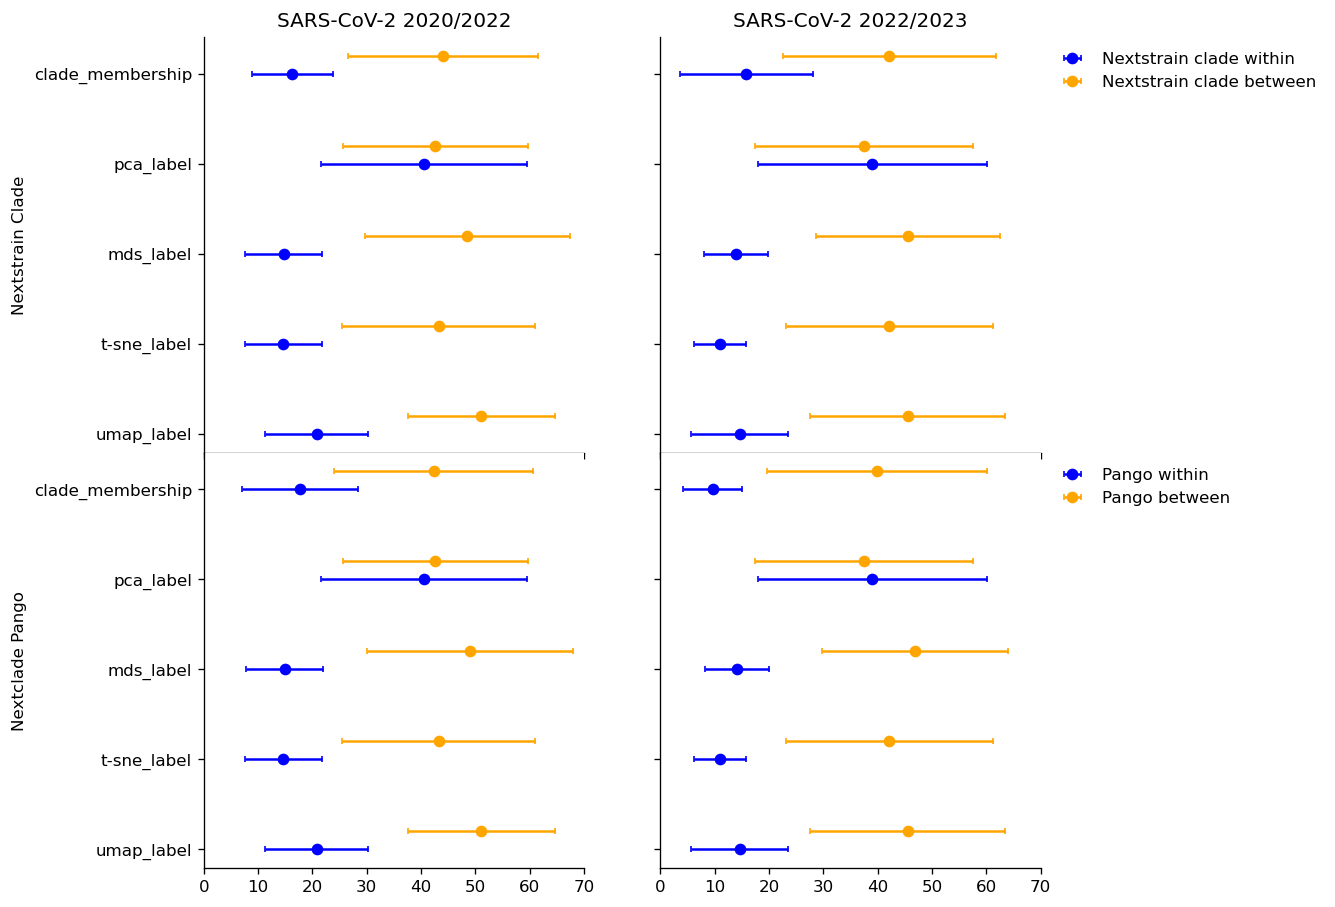

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(9,9), dpi=120, sharex=True, sharey=True)
make_subplot_sars(within_between_df_sars_training, ax[0][0], 'Nextstrain_clade', "Nextstrain clade") # early, nextclade
make_subplot_sars(within_between_df_sars_test, ax[0][1], 'Nextstrain_clade', "Nextstrain clade") # late, nextclade
make_subplot_sars(within_between_df_sars_training, ax[1][0], 'Nextclade_pango_collapsed', "Pango") # early, pango
make_subplot_sars(within_between_df_sars_test, ax[1][1], 'Nextclade_pango_collapsed', "Pango") # late, pango
# late - each method represented twice
# clade membership should have both nextstrain clade and pango lineages
# share row and col (2 by 2 figures) - left nextstrain clade, right  pango 
# generate both within_between dataframes for diff clade membership definitions

ax[0][0].set_title("SARS-CoV-2 2020/2022")
ax[0][1].set_title("SARS-CoV-2 2022/2023")
ax[0][0].set_ylabel("Nextstrain Clade")
ax[1][0].set_ylabel("Nextclade Pango")

ax[0][1].legend(
    frameon=False,
    bbox_to_anchor=(1.0, 1.0), 
    loc="upper left"
)

ax[1][1].legend(
    frameon=False,
    bbox_to_anchor=(1.0, 1.0), 
    loc="upper left"
)
    
plt.subplots_adjust(hspace=.0)#, wspace=.0)
sns.despine()

# make x axis bigger, move legend to x axis of one chart (rotate legend in another way, add y axis buffer to each figure)
# replace variable names (pca_label -> pca)
# replace clade_membership with actual clade_membership
# use nextclade_pango_collapsed in legend not just pango
# x axis label (pairwise genetic distance (nucleotides))

In [105]:
within_between_df_test

,comparison,mean,median,std,group
0,between,42.846700,40.0,20.491251,clade_membership
1,within,9.043487,8.0,4.454662,clade_membership
2,between,46.348415,45.0,19.077296,pca_label
3,within,11.621659,10.0,5.937408,pca_label
4,between,44.710134,42.0,19.773608,mds_label
5,within,8.750679,8.0,4.010667,mds_label
6,between,45.331995,43.0,19.268336,t-sne_label
7,within,10.178886,9.0,5.192870,t-sne_label
8,between,45.340607,43.0,19.316999,umap_label
9,within,10.785142,9.0,6.821634,umap_label


/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


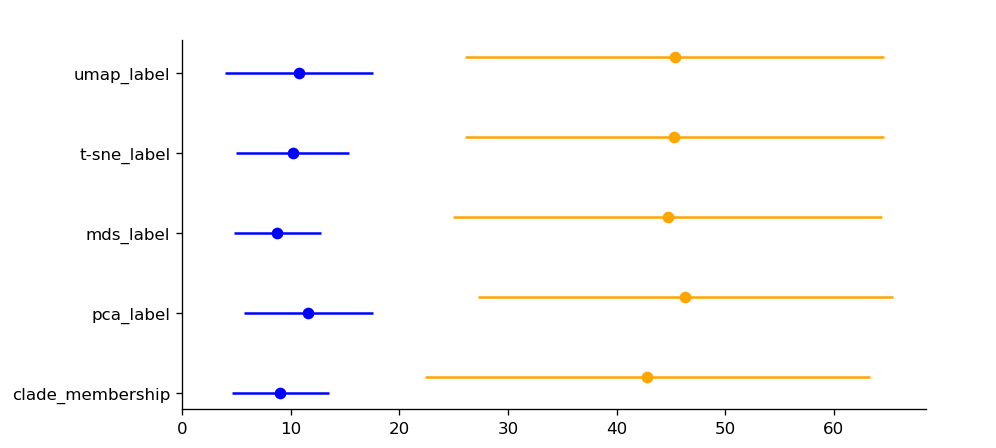

In [57]:
# old v new, mcc, clade membership
import matplotlib
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=120)

df = within_between_df_test

x_positions = np.arange(len(df.to_numpy()) // 2)

ax.errorbar(df[df["comparison"] == "within"]["mean"],x_positions, xerr= df[df["comparison"] == "within"]["std"], fmt='o', color="blue")
ax.errorbar(df[df["comparison"] == "between"]["mean"], x_positions + 0.2, xerr= df[df["comparison"] == "between"]["std"], fmt='o', color="orange")
#ax.scatter(within_between_df["group"], within_between_df["mean"], c=cmap(within_between_df["comparison"]), s=100)
ax.set_yticklabels([""] + list(df["group"].unique()))
ax.set_xlim(0)

ax.legend(
    frameon=False,
    bbox_to_anchor=(1.05, 1.1), 
    loc="upper left"
)
sns.despine()

/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


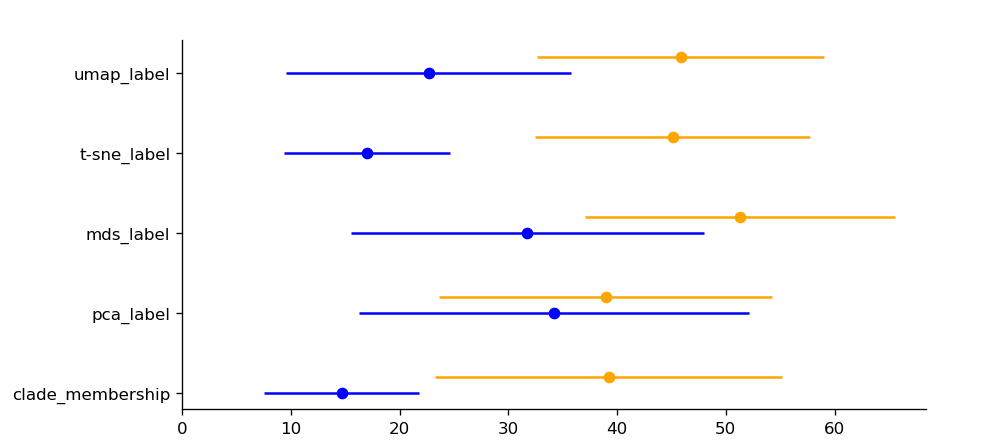

In [129]:
# old v new, mcc, clade membership
import matplotlib
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=120)

df = within_between_df_sars

x_positions = np.arange(len(df.to_numpy()) // 2)

ax.errorbar(df[df["comparison"] == "within"]["mean"],x_positions, xerr= df[df["comparison"] == "within"]["std"], fmt='o', color="blue")
ax.errorbar(df[df["comparison"] == "between"]["mean"], x_positions + 0.2, xerr= df[df["comparison"] == "between"]["std"], fmt='o', color="orange")
#ax.scatter(within_between_df["group"], within_between_df["mean"], c=cmap(within_between_df["comparison"]), s=100)
ax.set_yticklabels([""] + list(df["group"].unique()))
ax.set_xlim(0)

ax.legend(
    frameon=False,
    bbox_to_anchor=(1.05, 1.1), 
    loc="upper left"
)
sns.despine()

# Annotated Embedding 

In [10]:
annotated_embeddings = pd.read_csv("../seasonal-flu-nextstrain/results/annotated_embeddings.tsv", sep="\t")

In [11]:
annotated_embeddings

,strain,y_value,is_internal_node,numdate,clade_membership,mutation_length,pca1,pca2,pca_label,mds1,mds2,mds3,mds_label,tsne_x,tsne_y,t-sne_label,umap_x,umap_y,umap_label
0,NODE_0000002,94.548742,False,2014.675979,3c,1.000000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NODE_0001505,13.212524,False,2015.325479,3c3,2.908326e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A/Chungbuk/107/2016,1.000000,True,2016.047814,3c3,5.804706e-04,-2.031452,4.779128,0.0,-17.822195,2.122602,-14.733152,-1.0,-8.951086,36.197809,0.0,3.478249,5.467498,5.0
3,NODE_0001507,2.875000,False,2015.479970,3c3,1.161523e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A/MUWRP-Uganda/579/2016,2.000000,True,2016.665301,3c3,9.982991e-03,-1.668016,5.142681,0.0,-36.678456,16.716646,-2.547138,-1.0,-9.132772,35.496809,0.0,17.476711,14.438039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,NODE_0001567,1916.750000,False,2017.609038,A1b/135K,5.627768e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,A/Quebec/009/2018,1916.000000,True,2018.017808,A1b/135K,5.810239e-04,-2.814361,-1.327946,2.0,2.811212,-15.896244,0.854186,4.0,-35.307837,-4.022749,1.0,7.079655,-9.704220,7.0
3200,NODE_0001570,1917.500000,False,2017.700000,A1b/135K,5.627768e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3201,A/Florida/6461/2017,1917.000000,True,2017.949315,A1b/135K,5.627768e-17,-2.814594,-1.327695,2.0,2.769400,-14.802311,0.848210,4.0,-35.356248,-3.965697,1.0,7.254097,-9.799011,7.0


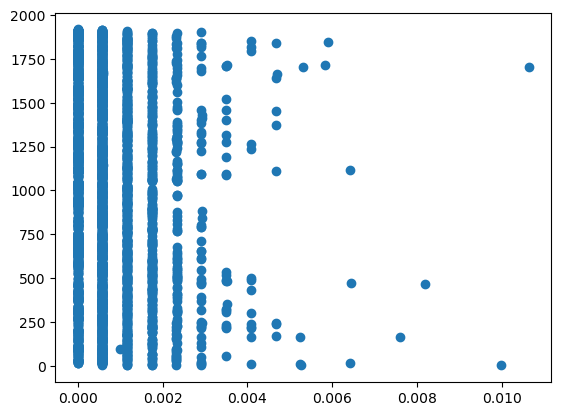

In [12]:
import seaborn as sns

plt.scatter(annotated_embeddings["mutation_length"], annotated_embeddings["y_value"])

In [15]:
import altair as alt
dataFrame = annotated_embeddings

In [42]:
base = alt.Chart(dataFrame[dataFrame["is_internal_node"] == True])
brush = alt.selection(type='interval', resolve='global')
tips = base.mark_circle().encode(
    x=alt.X(
        "mutation_length:Q",
        scale=alt.Scale(
            domain=(dataFrame["mutation_length"].min() - 0.0002, dataFrame["mutation_length"].max() + 0.0002)),
        title="Divergence",
        axis=alt.Axis(labels=True, ticks=True)
    ),
    y=alt.Y(
        "y_value:Q",
        title="",
        axis=alt.Axis(labels=False, ticks=False)
    ),
    #color=alt.condition(brush, if_false=alt.ColorValue('gray'), if_true=alt.Color(color, scale=alt.Scale(domain=domain, range=range_))),
    #tooltip=ToolTip
).add_selection(brush)

lines = alt.Chart(dataFrame[dataFrame["is_internal_node"] == False]).mark_line().encode(
            x=alt.X("mutation_length:Q", scale=alt.Scale(domain=(dataFrame["mutation_length"].min() - 0.0002, dataFrame["mutation_length"].max() + 0.0002))),
            x2="mutation_length:Q",
            y="y_value:Q",
            y2="y_value:Q",
            color=alt.ColorValue("#cccccc")
        )

In [44]:
lines

alt.Chart(...)